In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

#Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Define paths
train_data_dir = '/content/drive/MyDrive/Face_Recognition/train/'
validation_data_dir = '/content/drive/MyDrive/Face_Recognition/validate/'

# Parameters
img_width, img_height = 224, 224
batch_size = 32
num_epochs = 3
num_classes = len(os.listdir(train_data_dir))

# Data augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255)

validation_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Save class labels
class_labels = list(train_generator.class_indices.keys())
class_label_values = list(train_generator.class_indices.values())
# with open('/content/drive/MyDrive/Face_Recognition/class_labels.pkl', 'wb') as f:
#     pickle.dump(class_labels, f)
print(class_labels)
print(class_label_values)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained VGG16 model without top layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# # Freeze the layers
# for layer in vgg16_base.layers:
#     layer.trainable = False
for layer in vgg16_base.layers[:-2]:
    layer.trainable = False

# Custom classification layers
model = Sequential([
    vgg16_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Learning rate scheduler
def lr_scheduler(epoch):
    if epoch < 3:
        return 0.0001
    else:
        return 0.00001

scheduler = LearningRateScheduler(lr_scheduler)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 10304 images belonging to 32 classes.
['amarisian_', 'banmingkai_', 'chenziang_', 'chientingwei_', 'gowdarachandrashekarappasrivarsha_', 'huangjiaoyan_', 'kodipunzulanandini_', 'lishumeng_', 'liuhongji_', 'lozanoroberto_', 'manglaniroshanlakhi_', 'mendonakshay_', 'negiparth_', 'oraisisaac_', 'perambuduruvishnu_', 'pereiranerissagodfrey_', 'ravijayanthidhanasekar_', 'sampagaonrahul_', 'selinayu_', 'shahmanali_', 'sivarajusairevanth_', 'somaniachal_', 'upadhyevaishnavi_', 'vanderlindenilona_', 'vennavellirajashekarreddy_', 'virvadianisargjyotin_', 'wukaiyue_', 'yashasvi_', 'zhangyuanzhen_', 'zhouchuandi_', 'zotaharsh_', 'zuluagagonzalezisabel_']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Found 1793 images belonging to 32 classes.


In [ ]:
from datetime import datetime

start_time = datetime.now()
print("Start time: ",start_time)
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[scheduler])

end_time = datetime.now()
print("End time: ",end_time)
print("Total time: ", end_time - start_time)

# Save the mode
model.save('/content/drive/MyDrive/Face_Recognition/face_recognition_vgg16.h5')

Start time:  2024-03-16 18:38:58.664774
Epoch 1/3
322/322 [==============================] - 6860s 21s/step - loss: 0.5840 - accuracy: 0.8509 - val_loss: 0.0778 - val_accuracy: 0.9833 - lr: 1.0000e-04
Epoch 2/3
322/322 [==============================] - 6844s 21s/step - loss: 0.0341 - accuracy: 0.9931 - val_loss: 0.0488 - val_accuracy: 0.9877 - lr: 1.0000e-04
Epoch 3/3
322/322 [==============================] - 6827s 21s/step - loss: 0.0156 - accuracy: 0.9976 - val_loss: 0.0499 - val_accuracy: 0.9844 - lr: 1.0000e-04
End time:  2024-03-17 00:21:56.667723
Total time:  5:42:58.002949


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Save the model
model.save('face_recognition_vgg16.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


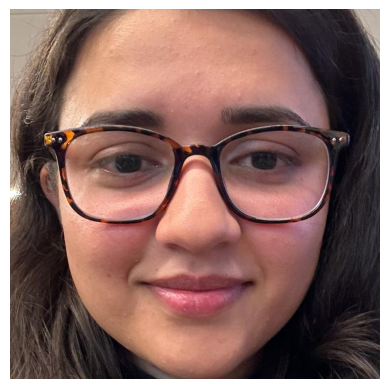

1/1 [==============================] - 1s 668ms/step
['amarisian_', 'banmingkai_', 'chenziang_', 'chientingwei_', 'gowdarachandrashekarappasrivarsha_', 'huangjiaoyan_', 'kodipunzulanandini_', 'lishumeng_', 'liuhongji_', 'lozanoroberto_', 'manglaniroshanlakhi_', 'mendonakshay_', 'negiparth_', 'oraisisaac_', 'perambuduruvishnu_', 'pereiranerissagodfrey_', 'ravijayanthidhanasekar_', 'sampagaonrahul_', 'selinayu_', 'shahmanali_', 'sivarajusairevanth_', 'somaniachal_', 'upadhyevaishnavi_', 'vanderlindenilona_', 'vennavellirajashekarreddy_', 'virvadianisargjyotin_', 'wukaiyue_', 'yashasvi_', 'zhangyuanzhen_', 'zhouchuandi_', 'zotaharsh_', 'zuluagagonzalezisabel_']
Predicted class label: yashasvi_
Predicted class index: 27


In [17]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import cv2
import matplotlib.pyplot as plt


# Load the saved model
saved_model_path = '/content/drive/MyDrive/Face_Recognition/face_recognition_vgg16.h5'
model = load_model(saved_model_path)

# Define the path to the image you want to test
image_path = '/content/drive/MyDrive/Face_Recognition/IMG_1111.jpeg'

train_data_dir = '/content/drive/MyDrive/Face_Recognition/train/'


# Function to preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Rescale to [0,1]
    return img_array



# Preprocess the image
processed_image = preprocess_image(image_path)



# Apply Haar Cascade for face detection
def detect_face(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Load the Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # If no face is detected, return None
    if len(faces) == 0:
        return None

    # Assume only one face is detected (for simplicity)
    (x, y, w, h) = faces[0]

    # Extract the detected face region
    face_image = img[y:y+h, x:x+w]

    return face_image

# Apply face detection on the image
face_image = detect_face(image_path)

# Display the detected face
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# If face is detected, preprocess the face image and make predictions
if face_image is not None:
    # Preprocess the face image
    face_image = cv2.resize(face_image, (224, 224))  # Resize to match model input size
    face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    face_image = face_image / 255.0  # Normalize pixel values to [0,1]
    face_image = np.expand_dims(face_image, axis=0)  # Add batch dimension

    # Predict the class of the face image
    predictions = model.predict(face_image)
    predicted_class_index = np.argmax(predictions)

    # Define class labels
    class_labels = sorted(os.listdir(train_data_dir))
    print(class_labels)

    # Get the predicted class label
    predicted_class_label = class_labels[predicted_class_index]
    print("Predicted class label:", predicted_class_label)
    print("Predicted class index:", predicted_class_index)
else:
    print("No face detected in the image.")